In [9]:
import pandas as pd

df = pd.read_csv('../data/sentiment_reviews.csv')

cbe_reviews = df[df['bank'] == 'CBE']
boa_reviews = df[df['bank'] == 'BOA']

cbe_positive = cbe_reviews[cbe_reviews['sentiment'] == 'positive']
cbe_negative = cbe_reviews[cbe_reviews['sentiment'] == 'negative']

print("CBE Positive reviews:")
print(cbe_positive['review'].head())

print("\nCBE Negative reviews:")
print(cbe_negative['review'].head())

CBE Positive reviews:
1                         Best Mobile Banking app ever
2                                                 good
3    it was good app but it have some issues like i...
5                                                 Good
6                                                   👌👍
Name: review, dtype: object

CBE Negative reviews:
11                                     it is not safety
13    it is like a childish app make it better the w...
20    Recently there is big problem when sending to ...
24                              lower system everything
28    I was using this app for the last two years wi...
Name: review, dtype: object


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import string
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_and_tokenize(text_series):
    words = []
    for text in text_series.dropna():
        # Lowercase, remove punctuation
        text = text.lower().translate(str.maketrans('', '', string.punctuation))
        # Tokenize and filter
        tokens = text.split()
        words += [w for w in tokens if w not in stop_words and len(w) > 2]
    return words

In [12]:
# Get tokens for CBE reviews
cbe_positive_words = preprocess_and_tokenize(cbe_positive['review'])
cbe_negative_words = preprocess_and_tokenize(cbe_negative['review'])

In [13]:
# Count word frequencies
cbe_pos_freq = Counter(cbe_positive_words).most_common(10)
cbe_neg_freq = Counter(cbe_negative_words).most_common(10)

print("Top CBE Positive Keywords (Drivers):", cbe_pos_freq)
print("Top CBE Negative Keywords (Pain Points):", cbe_neg_freq)


Top CBE Positive Keywords (Drivers): [('app', 78), ('good', 44), ('best', 26), ('nice', 19), ('cbe', 17), ('like', 15), ('great', 14), ('easy', 13), ('banking', 11), ('application', 11)]
Top CBE Negative Keywords (Pain Points): [('app', 12), ('banking', 6), ('send', 4), ('mobile', 4), ('application', 4), ('worst', 3), ('ever', 3), ('seen', 3), ('problem', 3), ('even', 3)]


Top Drivers (Positive Feedback):
“Good” / “Best” / “Nice” → General satisfaction with the app experience

“Easy” → Indicates ease of use

“Great” / “Like” → Positive user sentiment overall

“Banking” / “Application” → Reflects approval of core features

Top Pain Points (Negative Feedback):
“Problem” / “Worst” / “Ever” → Strong dissatisfaction signals

“Send” / “Mobile” / “Application” → Suggests issues with money transfer and mobile app performance

“Seen” / “Even” → Vague, but used in negative contexts like “worst app I’ve ever seen”




In [14]:
# --- BOA Analysis ---
boa_positive = boa_reviews[boa_reviews['sentiment'] == 'positive']
boa_negative = boa_reviews[boa_reviews['sentiment'] == 'negative']

boa_positive_words = preprocess_and_tokenize(boa_positive['review'])
boa_negative_words = preprocess_and_tokenize(boa_negative['review'])

boa_pos_freq = Counter(boa_positive_words).most_common(10)
boa_neg_freq = Counter(boa_negative_words).most_common(10)

print("\nTop BOA Positive Keywords (Drivers):", boa_pos_freq)
print("Top BOA Negative Keywords (Pain Points):", boa_neg_freq)


Top BOA Positive Keywords (Drivers): [('app', 55), ('good', 24), ('please', 19), ('bank', 18), ('best', 15), ('boa', 13), ('banking', 13), ('mobile', 12), ('like', 12), ('better', 12)]
Top BOA Negative Keywords (Pain Points): [('app', 72), ('worst', 17), ('bank', 16), ('even', 12), ('work', 11), ('time', 10), ('ever', 10), ('boa', 9), ('mobile', 9), ('fix', 9)]


In [15]:
# --- Dashen Analysis ---
dashen_reviews = df[df['bank'] == 'Dashen']
dashen_positive = dashen_reviews[dashen_reviews['sentiment'] == 'positive']
dashen_negative = dashen_reviews[dashen_reviews['sentiment'] == 'negative']

dashen_positive_words = preprocess_and_tokenize(dashen_positive['review'])
dashen_negative_words = preprocess_and_tokenize(dashen_negative['review'])

dashen_pos_freq = Counter(dashen_positive_words).most_common(10)
dashen_neg_freq = Counter(dashen_negative_words).most_common(10)

print("\nTop Dashen Positive Keywords (Drivers):", dashen_pos_freq)
print("Top Dashen Negative Keywords (Pain Points):", dashen_neg_freq)



Top Dashen Positive Keywords (Drivers): [('app', 175), ('dashen', 82), ('super', 69), ('banking', 59), ('bank', 54), ('best', 43), ('use', 39), ('fast', 37), ('easy', 37), ('one', 36)]
Top Dashen Negative Keywords (Pain Points): [('app', 11), ('good', 7), ('ever', 4), ('fix', 3), ('mobile', 3), ('bank', 3), ('time', 3), ('disappointing', 3), ('working', 3), ('worst', 3)]


Top Drivers:

“Good” / “Best” / “Like” → Generally positive experience

“Mobile” / “Banking” → Users like the mobile banking functionality

“Better” / “Please” → Users still ask for improvement even in positive reviews (a sign of engagement)

Top Pain Points:

“Worst” / “Fix” / “Even” / “Ever” → Strong negative emotion

“Work” / “Time” / “Mobile” → Indicates app unreliability or downtime

“App” has high mentions → likely central to user issues

🔹 Dashen Bank
Top Drivers:

“Super” / “Best” / “Fast” / “Easy” → Strong praise for speed and performance

“Use” / “One” → Ease of use and maybe preference over other apps

“Banking” / “Dashen” → Positive branding

Top Pain Points:

Fewer complaints overall, but still:

“Fix” / “Working” / “Time” → Suggest some performance issues

“Disappointing” / “Worst” → Less frequent but notable



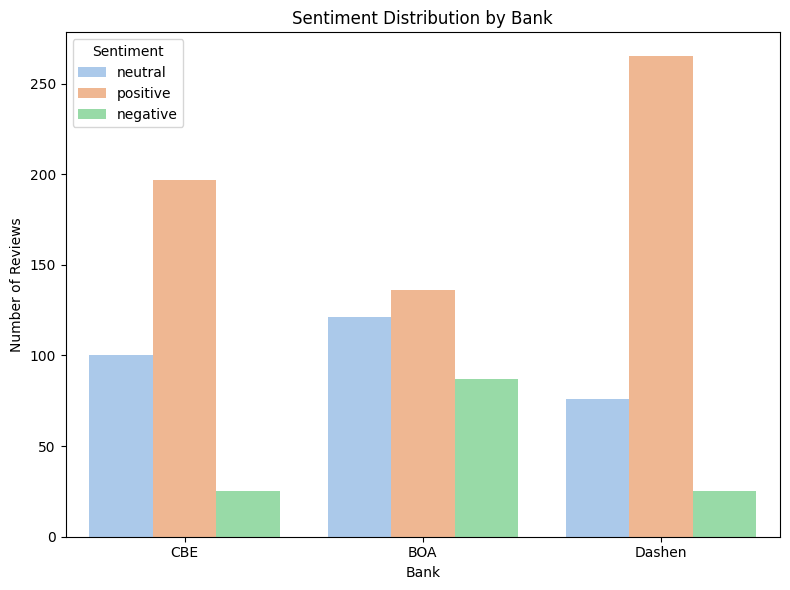

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Make sure the 'outputs' folder exists
os.makedirs('outputs', exist_ok=True)


# Plot: Sentiment distribution per bank
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bank', hue='sentiment', palette='pastel')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('outputs/sentiment_distribution_by_bank.png')
plt.show()


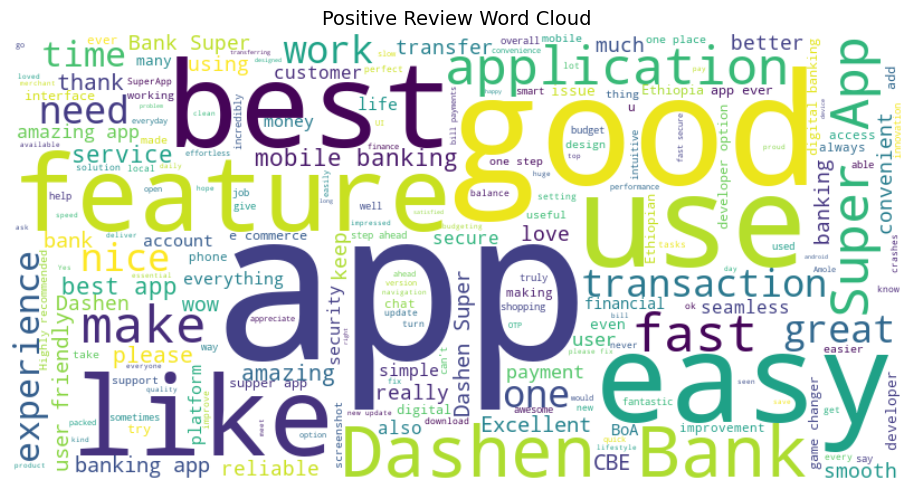

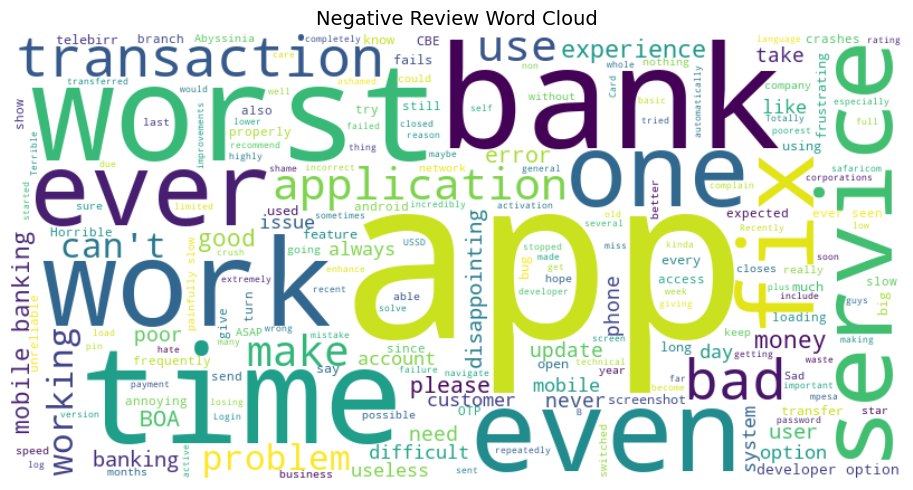

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stop_words, colormap='viridis').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.savefig(f"outputs/{filename}")
    plt.show()

# Filter positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['review'].astype(str)
negative_reviews = df[df['sentiment'] == 'negative']['review'].astype(str)

# Generate word clouds
generate_wordcloud(positive_reviews, "Positive Review Word Cloud", "positive_wordcloud.png")
generate_wordcloud(negative_reviews, "Negative Review Word Cloud", "negative_wordcloud.png")


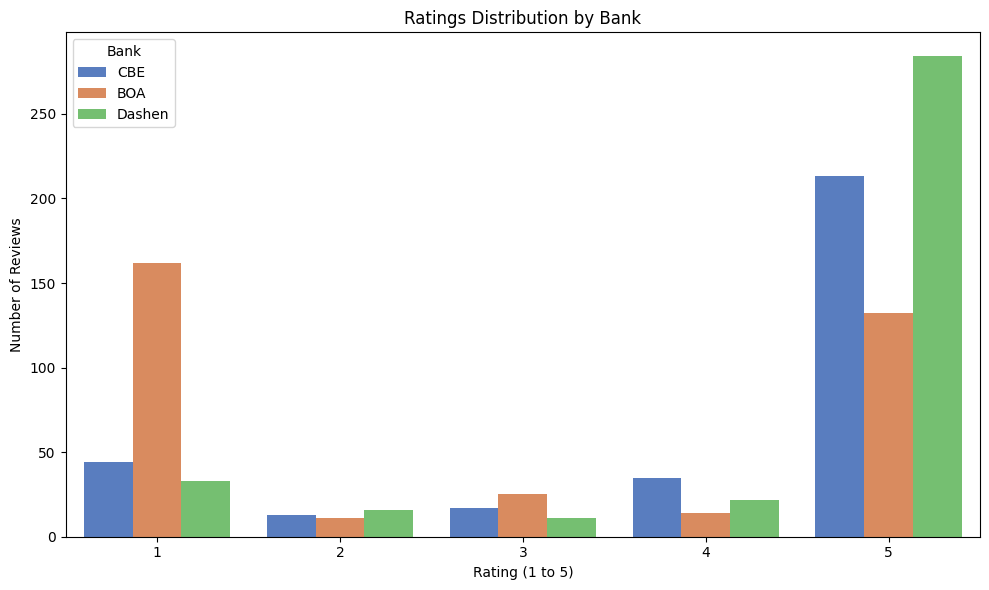

In [22]:
# Plot: Ratings distribution per bank
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='bank', palette='muted')
plt.title('Ratings Distribution by Bank')
plt.xlabel('Rating (1 to 5)')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.tight_layout()
plt.savefig('outputs/ratings_distribution_by_bank.png')
plt.show()


In [23]:
# Summarize drivers and pain points per bank (based on Step 3 results)
summary = """
Insights Summary:

CBE Bank:
- Drivers: Users appreciate the app’s ease of use, banking features, and overall performance.
- Pain Points: Some users complain about app crashes and transaction issues.

BOA Bank:
- Drivers: Positive feedback on the mobile banking capabilities and customer engagement.
- Pain Points: Frequent complaints about app reliability and slow performance.

Dashen Bank:
- Drivers: Users highlight fast, easy banking and a well-designed app.
- Pain Points: Occasional reports of glitches and disappointing features.

Recommendations:
1. Improve app stability and fix crashes, especially for CBE and BOA apps.
2. Enhance transaction speed and reliability across all banks.
3. Introduce new features like budgeting tools or personalized alerts to increase user satisfaction.
4. Continuously monitor and respond to user feedback to improve app experience.

Note on Ethics:
- Review data may have biases; negative reviews are often more vocal. Use multiple data sources for balanced decisions.
"""

print(summary)



Insights Summary:

CBE Bank:
- Drivers: Users appreciate the app’s ease of use, banking features, and overall performance.
- Pain Points: Some users complain about app crashes and transaction issues.

BOA Bank:
- Drivers: Positive feedback on the mobile banking capabilities and customer engagement.
- Pain Points: Frequent complaints about app reliability and slow performance.

Dashen Bank:
- Drivers: Users highlight fast, easy banking and a well-designed app.
- Pain Points: Occasional reports of glitches and disappointing features.

Recommendations:
1. Improve app stability and fix crashes, especially for CBE and BOA apps.
2. Enhance transaction speed and reliability across all banks.
3. Introduce new features like budgeting tools or personalized alerts to increase user satisfaction.
4. Continuously monitor and respond to user feedback to improve app experience.

Note on Ethics:
- Review data may have biases; negative reviews are often more vocal. Use multiple data sources for balance